In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

In [12]:
image_gray = cv2.imread('/Users/USER/Downloads/PROJECT FIX/DATASET_grayscale(3)/A/A55.jpg', cv2.IMREAD_GRAYSCALE)

In [8]:
# import numpy as np

# Fungsi Gaussian
def Gaussian_function(x, y):
  # Menghitung sigma
  sigma = 1 / (2 * np.log(2))

  # Menghitung nilai fungsi Gaussian
  value = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

  # Mengembalikan nilai fungsi
  return value

# Membuat kernel Gaussian
Gaussian_kernal = np.array([[Gaussian_function(-1, -1), Gaussian_function(0, -1), Gaussian_function(1, -1)],
               [Gaussian_function(-1, 0), Gaussian_function(0, 0), Gaussian_function(1, 0)],
               [Gaussian_function(-1, 1), Gaussian_function(0, 1), Gaussian_function(1, 1)]])

# Menormalkan kernel
Gaussian_kernal = Gaussian_kernal / Gaussian_kernal.sum()

# Mencetak kernel Gaussian
print(Gaussian_kernal)


[[0.04697132 0.12278604 0.04697132]
 [0.12278604 0.32097054 0.12278604]
 [0.04697132 0.12278604 0.04697132]]


In [14]:
# Membuat matriks det dengan tambahan padding 0 pada sisi kanan dan bawah
pad = np.zeros((image_gray.shape[0] + 2, image_gray.shape[1] + 2))

# Zero padding
for i in range(image_gray.shape[0]):
  for j in range(image_gray.shape[1]):
    pad[i + 1][j + 1] = image_gray[i][j]

# Matriks hasil akhir
output_image = image_gray

# Menghitung nilai setiap pixel di output_image menggunakan kernel Gaussian
for i in range(1, pad.shape[0] - 1, 1):
  for j in range(1, pad.shape[1] - 1, 1):
    # Mencari nilai dari 3x3 window di sekitar pixel (i, j)
    x = np.array([[pad[i + 1][j + 1], pad[i][j + 1], pad[i - 1][j + 1]],
                  [pad[i + 1][j], pad[i][j], pad[i - 1][j]],
                  [pad[i + 1][j - 1], pad[i][j - 1], pad[i - 1][j - 1]]])
    
    # Menghitung nilai pixel (i, j) di output_image dengan mengalikan window dengan kernel Gaussian
    output_image[i - 1][j - 1] = round(np.sum(np.multiply(x, Gaussian_kernal)))

# Mencetak output_image
print(output_image)
    
# print(pad)

[[112 142 141 ... 127 127 100]
 [143 182 181 ... 163 163 128]
 [143 183 182 ... 164 164 128]
 ...
 [ 28  37  38 ... 111 115  93]
 [ 29  36  36 ... 112 114  91]
 [ 23  28  27 ...  88  88  70]]


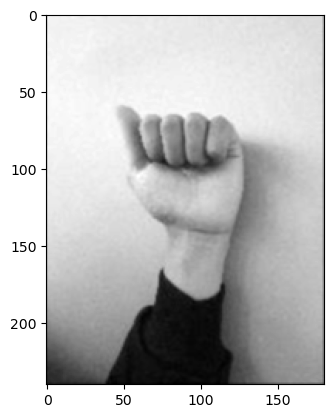

In [15]:
plt.imshow(output_image,cmap='gray')
# cv2.imwrite('/Users/USER/Downloads/PROJECT/DATASET_gaussian_blur/Z/Z55.jpg', output_image)

In [16]:
# image = cv2.imread('/Users/USER/Downloads/PROJECT/DATASET_grayscale/A/A2.jpg')
# blur = cv2.GaussianBlur(image,(5,5),1)
# plt.imshow(blur, cmap="gray")
# cv2.imwrite('/Users/USER/Downloads/PROJECT/DATASET_gaussian_blur/A/A2_1.jpg', blur)